# Modelling Class
<p>In this notebook, I am going to try to unify many of the hydrogeology concepts that I have already created. I'll create a <b>FlowModel</b> class to keep things a whole lot more organized. For now, it's just 1D.</p>

In [44]:
class FlowModel:
    def __init__(self, length = 10, scale = 1,conductivity = .1,Ss = 1, timeStep = 1):
        import matplotlib.pyplot as plt
        import numpy as np
        global np
        self.length = length
        self.heads = np.zeros(length)
        self.concentrations = np.zeros(length)
        self.Ss = Ss
        self.conductivity = conductivity
        self.timeStep = timeStep
        self.scale = scale
        self.pointConstants = []
        global plt
        self.plt = plt
        
    def flow(self, steps = 1):
        for i in range(steps):
            for i in range(len(self.pointConstants)):
                self.heads[self.pointConstants[i][0]] = self.pointConstants[i][1]
            queue = np.zeros(self.heads.shape)
            queue[1: ] += (self.heads[:-1] - self.heads[1: ])*self.conductivity
            queue[:-1] += (self.heads[1: ] - self.heads[:-1])*self.conductivity

            self.heads += queue
            del queue
        
    def addPointConstant(self, pos, change):
        '''
        Used to add a source term to the model
        '''
        self.pointConstants.append((pos, change))
    
    def concentrationChange(self):
        '''Dissolved solute transport'''
        pass
    
    def showModel(self):
        self.plt.figure(1)
        self.plt.subplot(111)
        self.plt.plot(self.heads)
        self.plt.xlabel("Element number")
        self.plt.ylabel("Head")
        self.plt.show()

    def __str__(self):
        print("Model Size: {}".format(self.length))
        print("Model Scale: {} units per element".format(self.scale))
        print("Conductivity: {}".format(self.conductivity))
        print("Specific storage: {}".format(self.Ss))
        return ""
        
    def basicPointChanges(self):
        '''
        This is really just a time saver that will set the first
        element equal to a value of 1 and the final equal to 0,
        just for some boundary conditions
        '''
        self.addPointConstant(0,1)
        self.addPointConstant(-1,0)

## Now to test the model
<p>Something that is important is that <u>all</u> of the values can be left alone during initialization. I'd really like this model to be as easy as possible for now.</p>

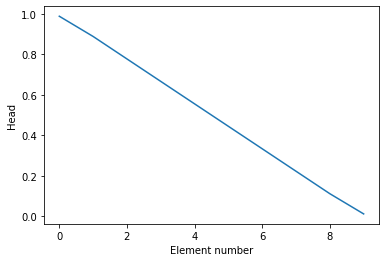

In [48]:
%matplotlib inline
model = FlowModel()
model.basicPointChanges()
model.flow(1000)
model.showModel()